In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import yfinance as yf
import math
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [125]:
gs_df = yf.download('GS')

[*********************100%***********************]  1 of 1 completed


In [126]:
gs_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-05-04,76.000000,77.250000,70.000000,70.375000,52.133808,22320900
1999-05-05,69.875000,69.875000,66.250000,69.125000,51.207798,7565700
1999-05-06,68.000000,69.375000,67.062500,67.937500,50.328106,2905700
1999-05-07,67.937500,74.875000,66.750000,74.125000,54.911812,4862300
1999-05-10,73.375000,73.500000,70.250000,70.687500,52.365303,2589400
...,...,...,...,...,...,...
2023-02-27,368.220001,370.299988,364.510010,365.529999,362.931335,2842400
2023-02-28,366.000000,366.010010,351.329987,351.649994,349.149994,4945600
2023-03-01,349.390015,352.540009,345.959991,346.230011,346.230011,2717400


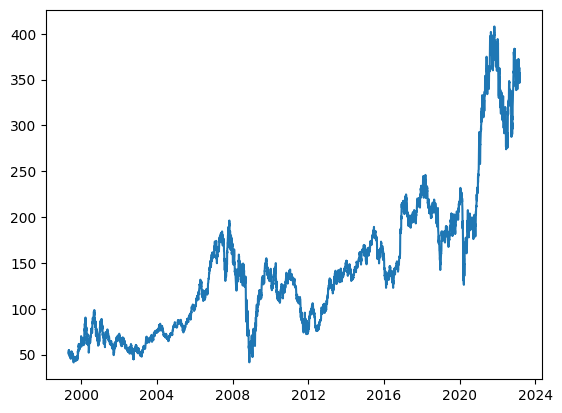

In [127]:
#Plotting obtained data 
pt.plot(gs_df.index, gs_df['Adj Close'])

In [128]:
# Designating and spliting apart training data and testing data  
# Using 90% of historic data for our training set that will be utilized to train model  
# Using remaining 10% to test accuracy of model 
gs_break_point_row = int(len(gs_df)*0.90)
gs_training_data, gs_testing_data = list(gs_df[0:gs_break_point_row]['Adj Close']), list(
    gs_df[gs_break_point_row:]['Adj Close'])


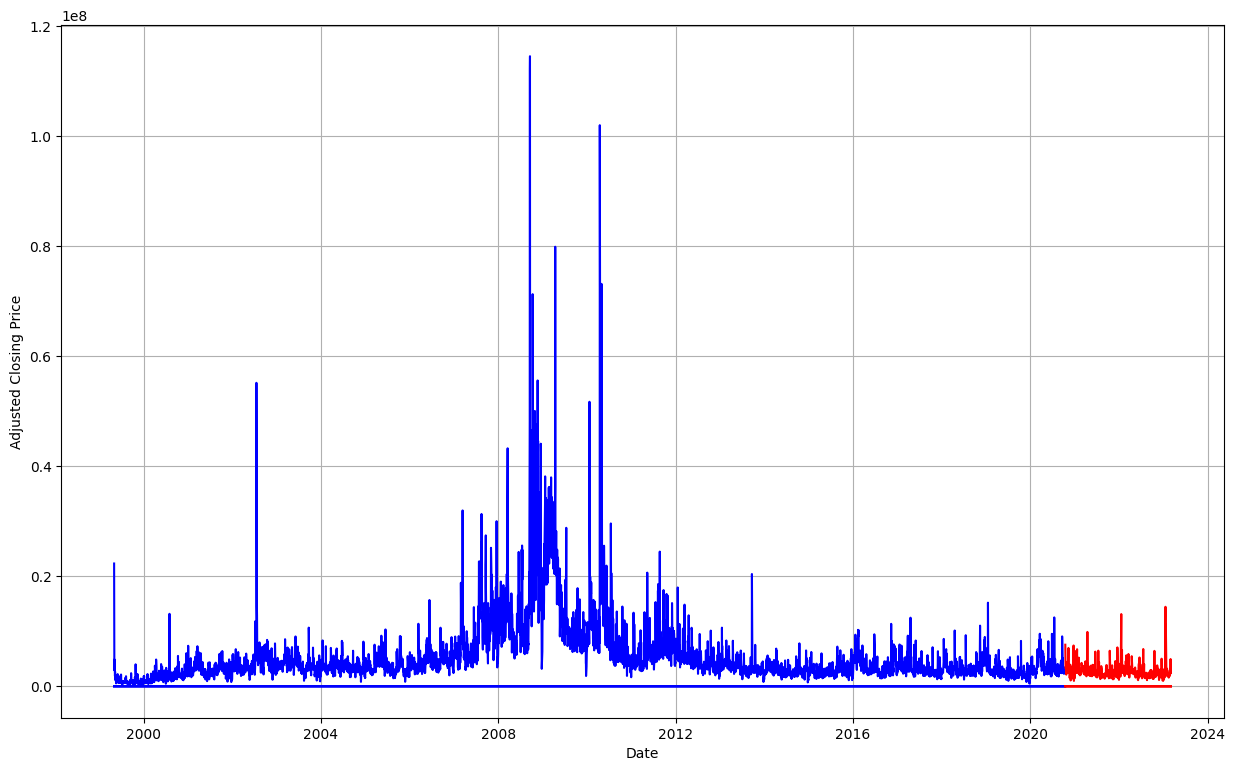

In [129]:
#Simultaneousely visualizing training and testing data using Matplotlib
pt.figure(figsize=(15,9))  
pt.grid(True) 
pt.xlabel('Date')  
pt.ylabel('Adjusted Closing Price')  
pt.plot(gs_df[0:gs_break_point_row], 'blue', label = 'Testing Data')  
pt.plot(gs_df[gs_break_point_row: ], 'red', label = 'Training Data')


In [130]:
#Creating a list for all model predictions  
gs_model_predictions = []
gs_number_of_test_observations = len(gs_testing_data)

In [131]:
  #Creating if loop that implements that the ARIMA Model and then fits the data and employs the forecast method
for i in range(gs_number_of_test_observations):  
  gs_model = sm.tsa.ARIMA(gs_training_data, order=(4,1,0))
  gs_model_fit = gs_model.fit()
  gs_model_output = gs_model_fit.forecast()
  gs_yhat = list(gs_model_output)
  gs_model_predictions.append(gs_yhat)  
  gs_actual_test_value = gs_testing_data[i]  
  gs_training_data.append(gs_actual_test_value) 
  

In [132]:
len(gs_model_predictions)


600

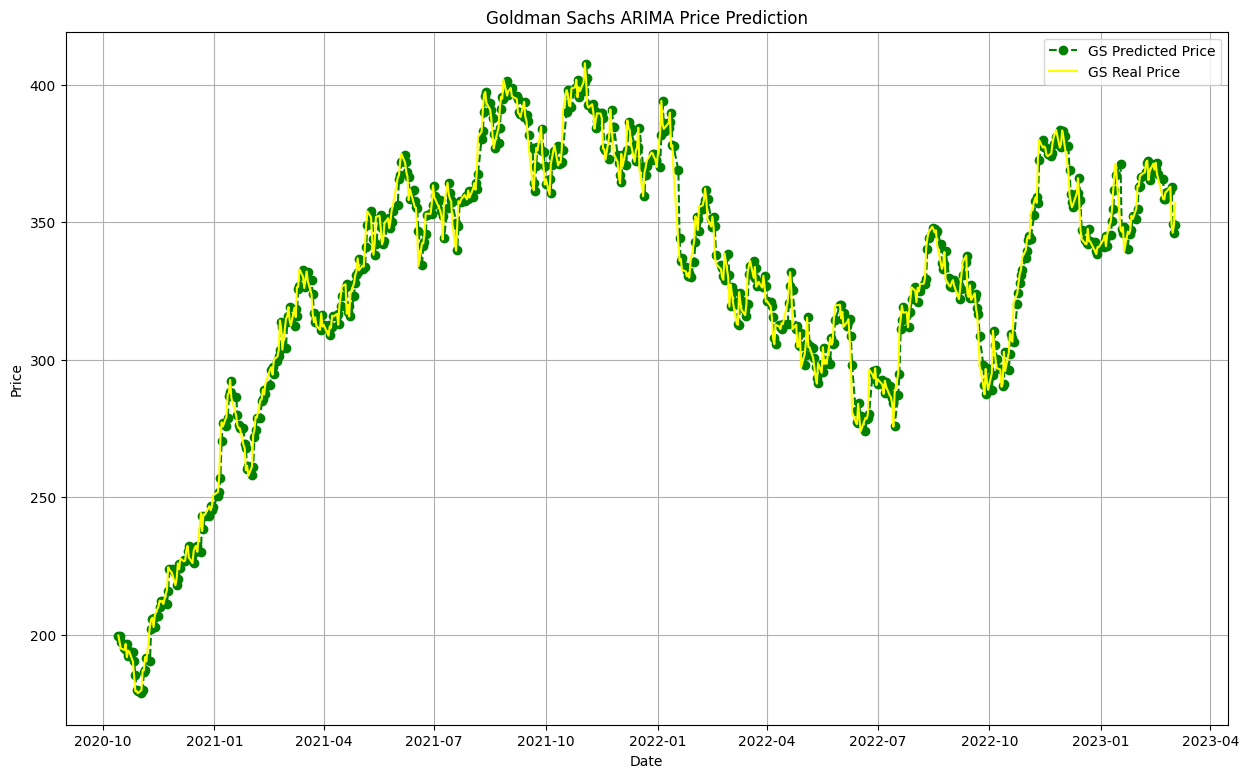

In [133]:
#Graphing ARIMA prediction  
pt.figure(figsize=(15, 9))
pt.grid(True)
date_range = gs_df[gs_break_point_row:].index  
pt.plot(date_range, gs_model_predictions, color = 'green', marker = 'o', linestyle = 'dashed', label = 'GS Predicted Price')  
pt.plot(date_range, gs_testing_data, color='yellow', label='GS Real Price')  
pt.title('Goldman Sachs ARIMA Price Prediction')  
pt.xlabel('Date')
pt.ylabel('Price')  
pt.legend()
pt.show()


In [134]:
mape = np.mean(np.abs(np.array(gs_model_predictions) - np.array(gs_testing_data))/np.abs(gs_testing_data))  
print('MAPE: ', str(mape))


MAPE:  0.17815585951470514


In [135]:
amzn_df = yf.download('JPM')


[*********************100%***********************]  1 of 1 completed


In [136]:
amzn_df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.000000,5.129630,5.018519,5.037037,1.114671,62775
1980-03-18,0.000000,5.111111,5.037037,5.074074,1.122867,64125
1980-03-19,0.000000,5.166667,5.111111,5.148148,1.139259,40500
1980-03-20,0.000000,5.148148,5.092593,5.111111,1.131063,18900
1980-03-21,0.000000,5.222222,5.111111,5.222222,1.155651,97200
...,...,...,...,...,...,...
2023-02-27,142.110001,143.309998,141.720001,142.160004,142.160004,10014700
2023-02-28,142.940002,143.759995,141.899994,143.350006,143.350006,11019800
2023-03-01,142.100006,143.460007,141.800003,142.550003,142.550003,7139200


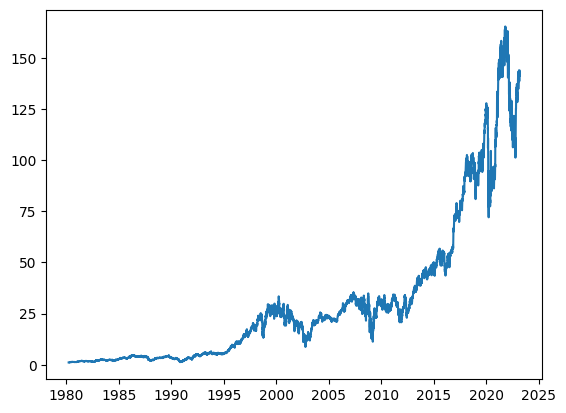

In [137]:
# Plotting obtained data
pt.plot(amzn_df.index, amzn_df['Adj Close'])


In [138]:
# Designating and spliting apart training data and testing data
# Using 90% of historic data for our training set that will be utilized to train model
# Using remaining 10% to test accuracy of model
amzn_break_point_row = int(len(amzn_df)*0.90)
amzn_training_data, amzn_testing_data = list(amzn_df[0:amzn_break_point_row]['Adj Close']), list(
    amzn_df[amzn_break_point_row:]['Adj Close'])


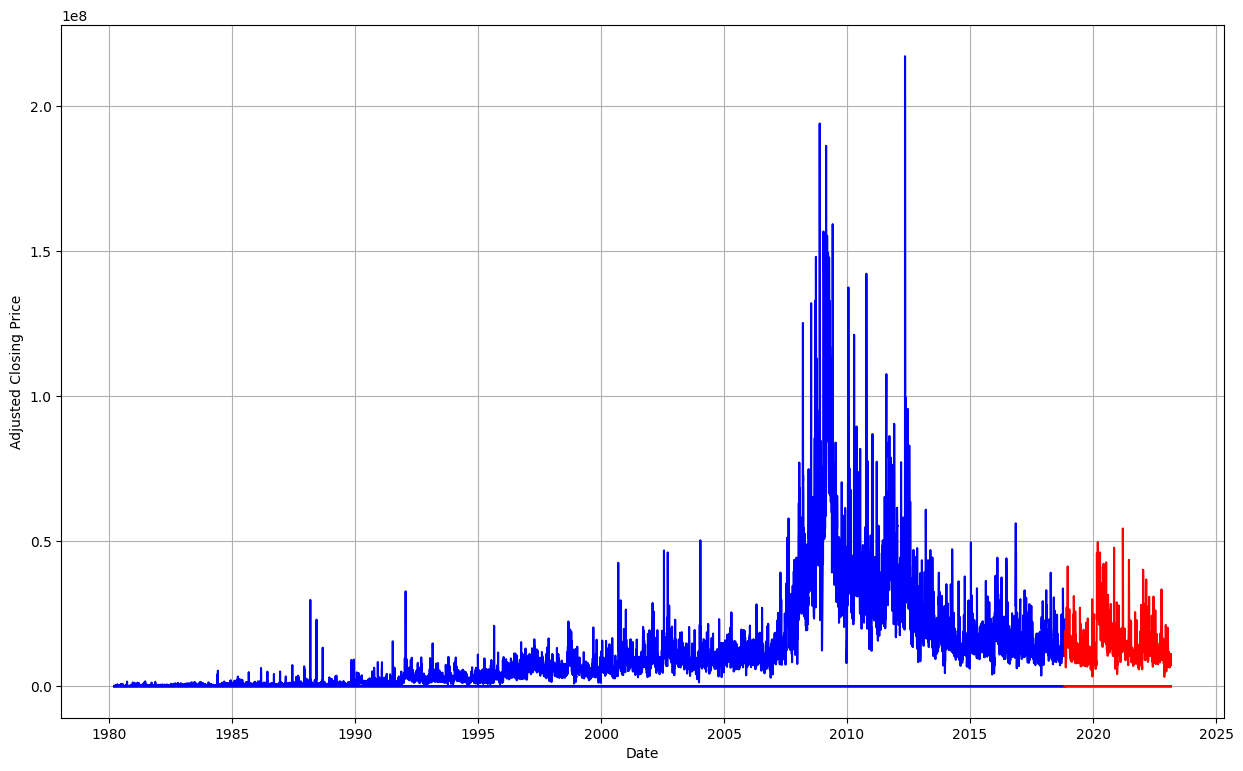

In [139]:
# Simultaneousely visualizing training and testing data using Matplotlib
pt.figure(figsize=(15, 9))
pt.grid(True)
pt.xlabel('Date')
pt.ylabel('Adjusted Closing Price')
pt.plot(amzn_df[0:amzn_break_point_row], 'blue', label='Testing Data')
pt.plot(amzn_df[amzn_break_point_row:], 'red', label='Training Data')


In [145]:
amzn_model_predictions = []
amzn_number_of_test_observations = len(amzn_testing_data)


In [146]:
for i in range(amzn_number_of_test_observations):
  amzn_model = sm.tsa.ARIMA(amzn_training_data, order=(4, 1, 0))
  amzn_model_fit = amzn_model.fit()
  amzn_model_output = amzn_model_fit.forecast()
  amzn_yhat = list(amzn_model_output)
  amzn_model_predictions.append(amzn_yhat)
  amzn_actual_test_value = amzn_testing_data[i]
  amzn_training_data.append(amzn_actual_test_value)


In [147]:
len(amzn_model_predictions)


1084

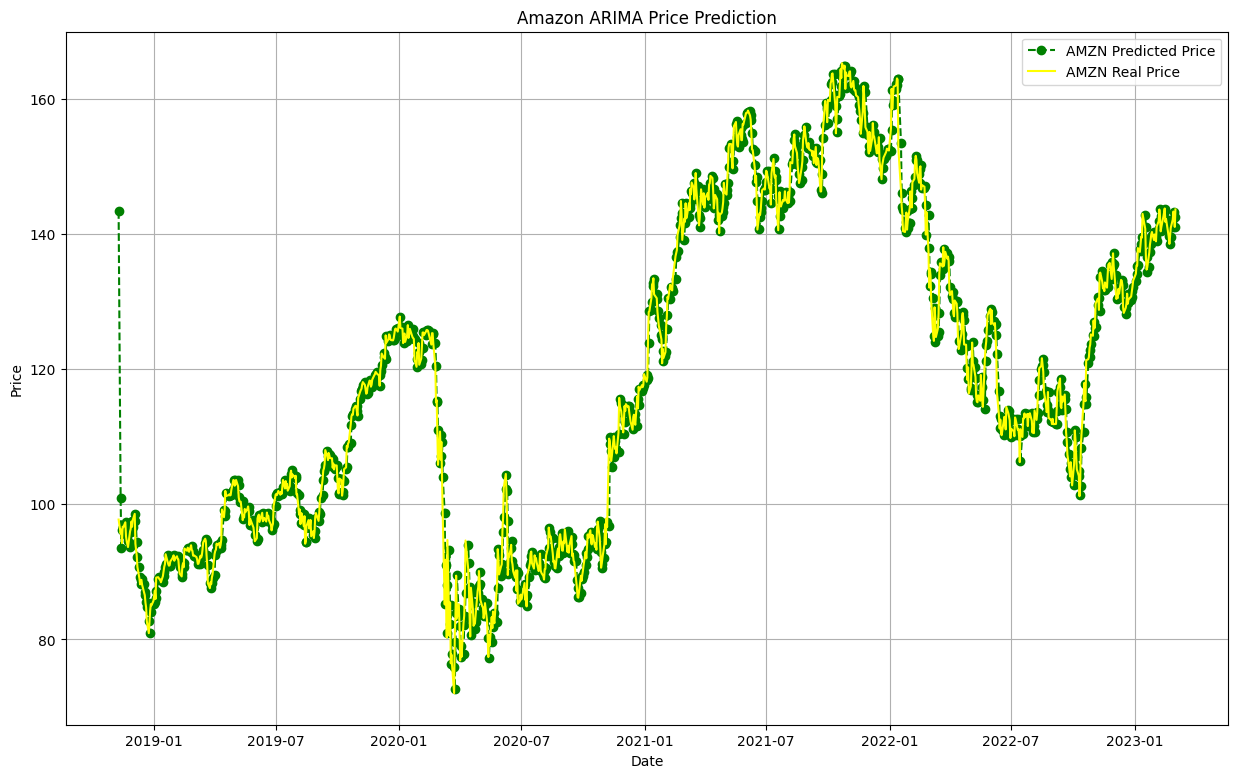

In [148]:
pt.figure(figsize=(15, 9))
pt.grid(True)
date_range = amzn_df[amzn_break_point_row:].index
pt.plot(date_range, amzn_model_predictions, color='green',
        marker='o', linestyle='dashed', label='AMZN Predicted Price')
pt.plot(date_range, amzn_testing_data, color='yellow', label='AMZN Real Price')
pt.title('Amazon ARIMA Price Prediction')
pt.xlabel('Date')
pt.ylabel('Price')
pt.legend()
pt.show()


In [149]:
mape = np.mean(np.abs(np.array(amzn_model_predictions) -
               np.array(amzn_testing_data))/np.abs(amzn_testing_data))
print('MAPE: ', str(mape))


MAPE:  0.23617472279833543
